In [35]:
import networkx as nx
import matplotlib.pyplot as plt


In [36]:
# Create a directed graph
G = nx.DiGraph()

# Define relationships
relationships = [
    ("Christopher", "Arthur", "father"), 
    ("Christopher", "Victoria", "father"),
    ("Andrew", "James", "father"),
    ("Andrew", "Jennifer", "father"),
    ("James", "Colin", "father"),
    ("James", "Charlotte", "father"),
    ("Roberto", "Emilio", "father"),
    ("Roberto", "Lucia", "father"),
    ("Pierro", "Marco", "father"),
    ("Pierro", "Angela", "father"),
    ("Marco", "Alfonso", "father"),
    ("Marco", "Sophia", "father"),

    ("Penelope", "Arthur", "mother"),
    ("Penelope", "Victoria", "mother"),
    ("Christine", "James", "mother"),
    ("Christine", "Jennifer", "mother"),
    ("Victoria", "Colin", "mother"),
    ("Victoria", "Charlotte", "mother"),
    ("Maria", "Emilio", "mother"),
    ("Maria", "Lucia", "mother"),
    ("Francesca", "Marco", "mother"),
    ("Francesca", "Angela", "mother"),
    ("Lucia", "Alfonso", "mother"),
    ("Lucia", "Sophia", "mother"),

    ("Christopher", "Penelope", "husband"),
    ("Andrew", "Christine", "husband"),
    ("Arthur", "Margaret", "husband"),
    ("James", "Victoria", "husband"),
    ("Charles", "Jennifer", "husband"),
    ("Roberto", "Maria", "husband"),
    ("Pierro", "Francesca", "husband"),
    ("Emilio", "Gina", "husband"),
    ("Marco", "Lucia", "husband"),
    ("Tomaso", "Angela", "husband"),

    ("Penelope", "Christopher", "wife"),
    ("Christine", "Andrew", "wife"),
    ("Margaret", "Arthur", "wife"),
    ("Victoria", "James", "wife"),
    ("Jennifer", "Charles", "wife"),
    ("Maria", "Roberto", "wife"),
    ("Francesca", "Pierro", "wife"),
    ("Gina", "Emilio", "wife"),
    ("Lucia", "Marco", "wife"),
    ("Angela", "Tomaso", "wife"),

    ("Arthur", "Christopher", "son"),
    ("Arthur", "Penelope", "son"),
    ("James", "Andrew", "son"),
    ("James", "Christine", "son"),
    ("Colin", "Victoria", "son"),
    ("Colin", "James", "son"),
    ("Emilio", "Roberto", "son"),
    ("Emilio", "Maria", "son"),
    ("Marco", "Pierro", "son"),
    ("Marco", "Francesca", "son"),
    ("Alfonso", "Lucia", "son"),
    ("Alfonso", "Marco", "son"),

    ("Victoria", "Christopher", "daughter"),
    ("Victoria", "Penelope", "daughter"),
    ("Jennifer", "Andrew", "daughter"),
    ("Jennifer", "Christine", "daughter"),
    ("Charlotte", "Victoria", "daughter"),
    ("Charlotte", "James", "daughter"),
    ("Lucia", "Roberto", "daughter"),
    ("Lucia", "Maria", "daughter"),
    ("Angela", "Pierro", "daughter"),
    ("Angela", "Francesca", "daughter"),
    ("Sophia", "Lucia", "daughter"),
    ("Sophia", "Marco", "daughter"),

    ("Arthur", "Victoria", "brother"),
    ("James", "Jennifer", "brother"),
    ("Colin", "Charlotte", "brother"),
    ("Emilio", "Lucia", "brother"),
    ("Marco", "Angela", "brother"),
    ("Alfonso", "Sophia", "brother"),

    ("Victoria", "Arthur", "sister"),
    ("Jennifer", "James", "sister"),
    ("Charlotte", "Colin", "sister"),
    ("Lucia", "Emilio", "sister"),
    ("Angela", "Marco", "sister"),
    ("Sophia", "Alfonso", "sister"),

    ("Arthur", "Colin", "uncle"),
    ("Charles", "Colin", "uncle"),
    ("Arthur", "Charlotte", "uncle"),
    ("Charles", "Charlotte", "uncle"),
    ("Emilio", "Alfonso", "uncle"),
    ("Tomaso", "Alfonso", "uncle"),
    ("Emilio", "Sophia", "uncle"),
    ("Tomaso", "Sophia", "uncle"),

    ("Jennifer", "Colin", "aunt"),
    ("Margaret", "Colin", "aunt"),
    ("Jennifer", "Charlotte", "aunt"),
    ("Margaret", "Charlotte", "aunt"),
    ("Angela", "Alfonso", "aunt"),
    ("Gina", "Alfonso", "aunt"),
    ("Angela", "Sophia", "aunt"),
    ("Gina", "Sophia", "aunt"),

    ("Colin", "Arthur", "nephew"),
    ("Colin", "Jennifer", "nephew"),
    ("Alfonso", "Emilio", "nephew"),
    ("Alfonso", "Angela", "nephew"),
    ("Colin", "Margaret", "nephew"),
    ("Colin", "Charles", "nephew"),
    ("Alfonso", "Gina", "nephew"),
    ("Alfonso", "Tomaso", "nephew"),

    ("Charlotte", "Arthur", "niece"),
    ("Charlotte", "Jennifer", "niece"),
    ("Sophia", "Emilio", "niece"),
    ("Sophia", "Angela", "niece"),
    ("Charlotte", "Margaret", "niece"),
    ("Charlotte", "Charles", "niece"),
    ("Sophia", "Gina", "niece"),
    ("Sophia", "Tomaso", "niece"),
]

relationship_dict = {tuple(rel): 1 for rel in relationships}

from itertools import product

# Extract unique subjects, predicates, and objects
subjects = set(r[0] for r in relationships)
objects = set(r[1] for r in relationships)
predicates = set(r[2] for r in relationships)


# Generate all possible combinations
all_combinations = product(subjects, predicates, objects)

# Filter out the existing true relationships and label them as false (-1)
for combo in all_combinations:
    if combo not in relationship_dict:
        relationship_dict[combo] = -1

# Add edges to the graph
for person1, person2, relation in relationships:
    G.add_edge(person1, person2, relationship=relation)


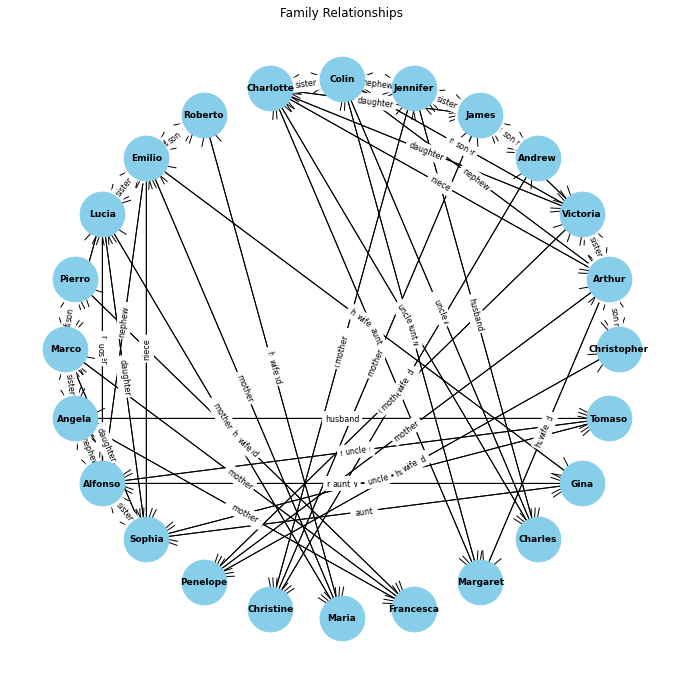

In [37]:
import matplotlib.pyplot as plt
import networkx as nx

# Assuming G is already defined and populated with nodes and edges
pos = nx.circular_layout(G)  # Define positions for nodes

# Set the figure size
plt.figure(figsize=(12, 12))

# Draw nodes
nx.draw_networkx_nodes(G, pos, node_size=2000, node_color='skyblue')

# Draw labels
nx.draw_networkx_labels(G, pos, font_size=9, font_weight='bold')

# Draw edges with custom arrow style
nx.draw_networkx_edges(G, pos, arrowstyle='->', arrowsize=50)

# Draw edge labels
edge_labels = nx.get_edge_attributes(G, 'relationship')
nx.draw_networkx_edge_labels(G, pos, font_size=8, edge_labels=edge_labels)

plt.title('Family Relationships')
plt.axis('off')  # Turn off the axis
plt.show()


/Users/andycaen/opt/anaconda3/lib/python3.8/site-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


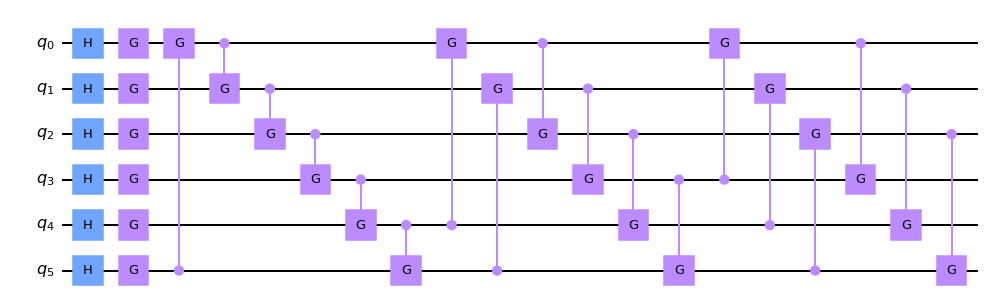

In [1]:
from qiskit import QuantumCircuit
from qiskit.circuit import Parameter
from qiskit.extensions import UnitaryGate
from qiskit.quantum_info import Operator
import numpy as np

# Define the parameterized gate G(α, β, γ)
def create_G_gate(alpha, beta, gamma):
    # Assuming alpha, beta, gamma are numerical values
    matrix = np.array([
        [np.exp(1j * beta) * np.cos(alpha),  np.exp(1j * gamma) * np.sin(alpha)],
        [-np.exp(-1j * gamma) * np.sin(alpha), np.exp(-1j * beta) * np.cos(alpha)]
    ])
    # Create a UnitaryGate from the matrix
    return UnitaryGate(Operator(matrix), label='G')

# Function to apply the G gate or its controlled version
def apply_G(qc, alpha, beta, gamma, target, control=None):
    G_gate = create_G_gate(alpha, beta, gamma)
    if control is None:
        qc.append(G_gate, [target])
    else:
        # Create a controlled-G gate
        c_G_gate = G_gate.control()
        qc.append(c_G_gate, [control, target])

# Parameters should be numeric for Operator instantiation
alpha_value = np.pi / 2  # Example values, replace with the actual ones
beta_value = np.pi / 2
gamma_value = np.pi / 2

# Create a quantum circuit with 6 qubits
qc = QuantumCircuit(6)

# Apply Hadamard gates to all qubits to create superposition
qc.h(range(6))

# Apply the G gates
for qubit in range(6):
    apply_G(qc, alpha_value, beta_value, gamma_value, qubit)

# Add controlled-G gates according to the desired pattern

#Control Range 1
apply_G(qc, alpha_value, beta_value, gamma_value, target=0, control=5)
apply_G(qc, alpha_value, beta_value, gamma_value, target=1, control=0)
apply_G(qc, alpha_value, beta_value, gamma_value, target=2, control=1)
apply_G(qc, alpha_value, beta_value, gamma_value, target=3, control=2)
apply_G(qc, alpha_value, beta_value, gamma_value, target=4, control=3)
apply_G(qc, alpha_value, beta_value, gamma_value, target=5, control=4)

#Control Range 2
apply_G(qc, alpha_value, beta_value, gamma_value, target=0, control=4)
apply_G(qc, alpha_value, beta_value, gamma_value, target=1, control=5)
apply_G(qc, alpha_value, beta_value, gamma_value, target=2, control=0)
apply_G(qc, alpha_value, beta_value, gamma_value, target=3, control=1)
apply_G(qc, alpha_value, beta_value, gamma_value, target=4, control=2)
apply_G(qc, alpha_value, beta_value, gamma_value, target=5, control=3)

#Control Range 3
apply_G(qc, alpha_value, beta_value, gamma_value, target=0, control=3)
apply_G(qc, alpha_value, beta_value, gamma_value, target=1, control=4)
apply_G(qc, alpha_value, beta_value, gamma_value, target=2, control=5)
apply_G(qc, alpha_value, beta_value, gamma_value, target=3, control=0)
apply_G(qc, alpha_value, beta_value, gamma_value, target=4, control=1)
apply_G(qc, alpha_value, beta_value, gamma_value, target=5, control=2)

# Visualize the circuit
qc.draw(output='mpl')
